# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

### Step 3. Assign it to a variable apple

In [2]:
apple = pd.read_csv('appl_1980_2014.csv')
apple.head()

Date   Open   High    Low  Close    Volume  Adj Close
0  2014-07-08  96.27  96.80  93.92  95.35  65130000      95.35
1  2014-07-07  94.14  95.99  94.10  95.97  56305400      95.97
2  2014-07-03  93.67  94.10  93.20  94.03  22891800      94.03
3  2014-07-02  93.87  94.06  93.09  93.48  28420900      93.48
4  2014-07-01  93.52  94.07  93.13  93.52  38170200      93.52

### Step 4.  Check out the type of the columns

In [3]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
Date         8465 non-null object
Open         8465 non-null float64
High         8465 non-null float64
Low          8465 non-null float64
Close        8465 non-null float64
Volume       8465 non-null int64
Adj Close    8465 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 463.0+ KB


### Step 5. Transform the Date column as a datetime type

In [4]:
apple['Date'] = pd.to_datetime(apple['Date'])
apple['Date'].head(10)

0   2014-07-08
1   2014-07-07
2   2014-07-03
3   2014-07-02
4   2014-07-01
5   2014-06-30
6   2014-06-27
7   2014-06-26
8   2014-06-25
9   2014-06-24
Name: Date, dtype: datetime64[ns]

In [5]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
Date         8465 non-null datetime64[ns]
Open         8465 non-null float64
High         8465 non-null float64
Low          8465 non-null float64
Close        8465 non-null float64
Volume       8465 non-null int64
Adj Close    8465 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 463.0 KB


### Step 6.  Set the date as the index

In [6]:
apple = apple.set_index('Date')
apple.head()

Open   High    Low  Close    Volume  Adj Close
Date                                                       
2014-07-08  96.27  96.80  93.92  95.35  65130000      95.35
2014-07-07  94.14  95.99  94.10  95.97  56305400      95.97
2014-07-03  93.67  94.10  93.20  94.03  22891800      94.03
2014-07-02  93.87  94.06  93.09  93.48  28420900      93.48
2014-07-01  93.52  94.07  93.13  93.52  38170200      93.52

### Step 7.  Is there any duplicate dates?

In [7]:
apple.duplicated().any()

False

### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [8]:
apple.sort_index(ascending = True).head()

Open   High    Low  Close     Volume  Adj Close
Date                                                        
1980-12-12  28.75  28.87  28.75  28.75  117258400       0.45
1980-12-15  27.38  27.38  27.25  27.25   43971200       0.42
1980-12-16  25.37  25.37  25.25  25.25   26432000       0.39
1980-12-17  25.87  26.00  25.87  25.87   21610400       0.40
1980-12-18  26.63  26.75  26.63  26.63   18362400       0.41

### Step 9. Get the last business day of each month

In [9]:
apple_month = apple.resample('BM')
apple_month.head()

Open       High        Low      Close        Volume  \
Date                                                                   
1980-12-31  30.481538  30.567692  30.443077  30.443077  2.586252e+07   
1981-01-30  31.754762  31.826667  31.654762  31.654762  7.249867e+06   
1981-02-27  26.480000  26.572105  26.407895  26.407895  4.231832e+06   
1981-03-31  24.937727  25.016818  24.836364  24.836364  7.962691e+06   
1981-04-30  27.286667  27.368095  27.227143  27.227143  6.392000e+06   

            Adj Close  
Date                   
1980-12-31   0.473077  
1981-01-30   0.493810  
1981-02-27   0.411053  
1981-03-31   0.387727  
1981-04-30   0.423333

### Step 10.  What is the difference in days between the first day and the oldest

In [10]:
(apple.index[0] - apple.index[8464]).days

12261

### Step 11.  How many months in the data we have?

In [11]:
len(apple_month)

404

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

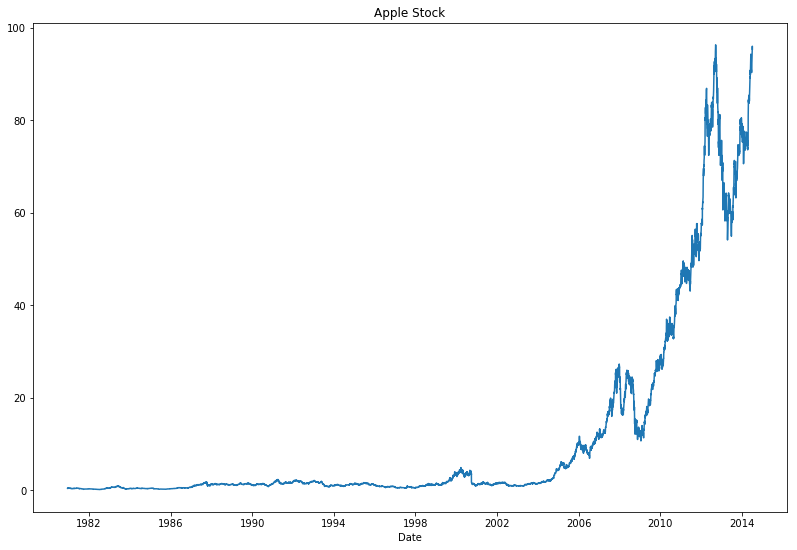

In [16]:
import matplotlib.pyplot as plt 
%matplotlib inline

plt.figure().set_size_inches(13.5, 9)
plt.plot(apple['Adj Close'])
plt.xlabel('Date'), plt.title('Apple Stock')
plt.show()

### BONUS: Create your own question and answer it.